In [224]:
%run paramtools.ipynb

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


 45 :
volume (w/s): 
WilcoxonResult(statistic=1.0, pvalue=5.5389755690943408e-09) 
SpearmanrResult(correlation=0.99177034301332423, pvalue=5.0171916700655526e-40) 
surface (w/s): 
WilcoxonResult(statistic=15.0, pvalue=1.4106990001138676e-08) 
SpearmanrResult(correlation=0.99388823763971246, pvalue=8.53828966206905e-43) 



,surface error [%],volume error [%],measurement_resolution
0,-1.781025,-3.824529,15
1,0.765714,0.032403,15
17,-1.767859,-3.788737,15
3,-1.781025,-3.824529,15
4,-1.765194,-3.759759,15
5,-1.800467,-3.803508,15
41,-1.757745,-3.784716,15
40,-2.372162,-3.897749,15
39,-1.728062,-3.744689,15
16,-1.780358,-3.784574,15


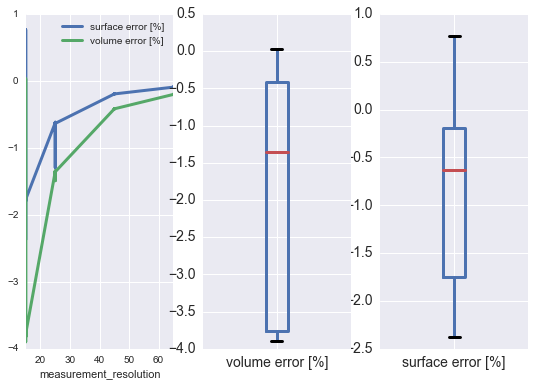

In [225]:
show_error(df)

In [226]:
df["output note"]

0                          element number inscribed
1     element number cylinder volume + sphere error
2                          element number inscribed
3                          element number inscribed
4                          element number inscribed
5                          element number inscribed
6                          element number inscribed
7                          element number inscribed
8                          element number inscribed
9                          element number inscribed
10                         element number inscribed
11                         element number inscribed
12                         element number inscribed
13                         element number inscribed
14                         element number inscribed
15                         element number inscribed
16                         element number inscribed
17                         element number inscribed
18                         element number inscribed
19          

# Object number

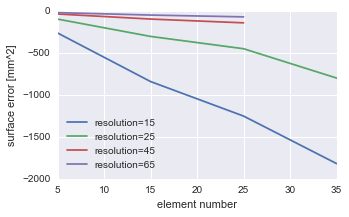

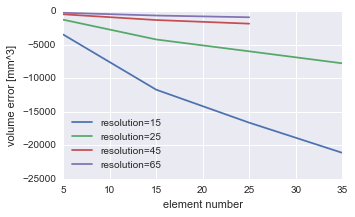

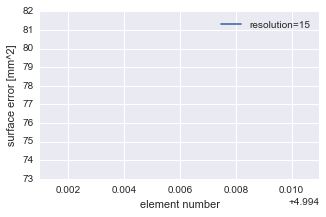

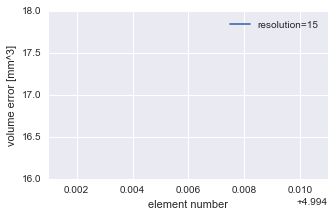

In [227]:

for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    if len(dfs) < 1:
        continue

    # surface
    ykey="surface error [mm^2]"
    # ykey="surface error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        #dfi.plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_surface_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=400)
    
    # volume
    ykey="volume error [mm^3]"
    # ykey="volume error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_volume_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=400)

In [228]:
zip(list(dfs_group))

[((15,    element number  measurement_resolution  volume error [mm^3]
   1               5                      15            16.995837),)]